# Telecom Customer Churn

In [1]:
# Import the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the excel file into a pandas dataframe.

data = pd.read_excel('Telco-Customer-Churn.xlsx')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
# Checking the columns present in the dataset
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
# The summary of the cars dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The telecom Customer Churn dataset contains the following data

- there is 7043 rows and 21 columns.
- this dataset contains customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges and Churn.

### 1) Compare churn count with respect to gender. 

In [5]:
# comparing Churn and Gender columns
data[['Churn','gender']]

,Churn,gender
0,No,Female
1,No,Male
2,Yes,Male
3,No,Male
4,Yes,Female
...,...,...
7038,No,Male
7039,No,Female
7040,No,Female
7041,Yes,Male


In [6]:
# Calculating the unique values in each columns
data[['Churn','gender']].value_counts()

Churn  gender
No     Male      2625
       Female    2549
Yes    Female     939
       Male       930
dtype: int64

In [7]:
# Calculating the unique values in each columns with respect to gender

churn_female_count_yes = data[['Churn','gender']].value_counts()['Yes','Female']
churn_female_count_no = data[['Churn','gender']].value_counts()['No','Female']
churn_male_count_yes = data[['Churn','gender']].value_counts()['Yes','Male']
churn_male_count_no = data[['Churn','gender']].value_counts()['No','Male']

print('churn count with respect to gender: \n','female churn count yes: ',churn_female_count_yes,
      '\nfemale churn count no: ', churn_female_count_no,'\nmale churn count yes: ',churn_male_count_yes,
      '\nmale churn count no: ',churn_male_count_no)

churn count with respect to gender: 
 female churn count yes:  939 
female churn count no:  2549 
male churn count yes:  930 
male churn count no:  2625


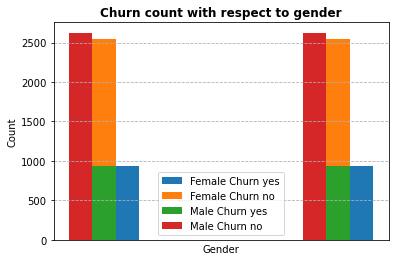

In [8]:
plt.figure(figsize = (6,4))
plot = plt.subplot(1,1,1)
plot.bar(data['gender']=='Female',churn_female_count_yes, width = .3, align = 'edge', label = 'Female Churn yes')
plot.bar(data['gender']=='Female',churn_female_count_no, width = .2, align = 'edge', label = 'Female Churn no')
plot.bar(data['gender']=='Male',churn_male_count_yes, width = .2, align = 'edge', label = 'Male Churn yes')
plot.bar(data['gender']=='Male',churn_male_count_no, width = .1, align = 'edge', label = 'Male Churn no')

#get handles and labels

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(labels)
plt.title('Churn count with respect to gender', fontweight='bold')
plt.xticks([])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(linestyle='--')

As you can see that, female churn count has more than the churn count of male. 
churn count with respect to gender: 
- female churn count yes:  939 
- female churn count no:  2549 
- male churn count yes:  930 
- male churn count no:  2625

### 2) Find out how many female senior citizens there in the dataset 

In [9]:
Female_senior = data[ (data['SeniorCitizen']==1) & (data['gender']=='Female') ]  # Retriving the female senior citizen
print('female senior citizens count : ',Female_senior['SeniorCitizen'].sum())

female senior citizens count :  568


### 3) Compare 'tenure' with 'Total Charges' 

In [10]:
# The summary of the dataset
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The TotalCharges is marked as object, so we need to convert it into float type

In [11]:
# Using errors=’coerce’. It will replace all non-numeric values with NaN
data['TotalCharges']=pd.to_numeric(data['TotalCharges'],errors = 'coerce') 
data['TotalCharges'].dtype

dtype('float64')

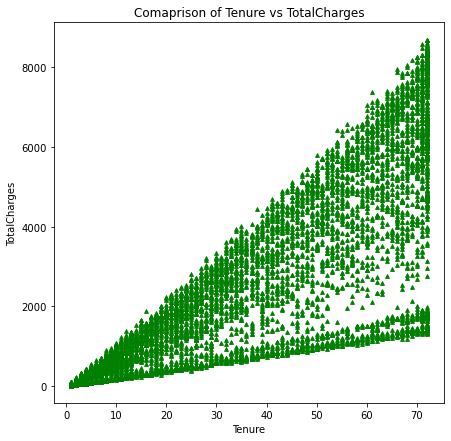

In [12]:
plt.figure(figsize=(7,7))
plt.scatter(data['tenure'],data['TotalCharges'],s=14,c='green',marker='^')
plt.title('Comaprison of Tenure vs TotalCharges')
plt.xlabel('Tenure')
plt.ylabel('TotalCharges')
plt.show()

From the above scatter plot, the tenure is increasing total charges paid is proportionaly increasing as total charge is a multiplier of tenure and MonthlyCharges and there follow a linear relationship between them.

### 4) Find out which contract is preferred by the senior citizen.

In [13]:
senior_cit = data[data['SeniorCitizen']==1]
senior_female = senior_cit[senior_cit['gender']=='Female']

print('senior citizen count: ',senior_cit['SeniorCitizen'].count(),
      '\nsenior female citizen count: ',senior_female['SeniorCitizen'].count())

senior citizen count:  1142 
senior female citizen count:  568


In [14]:
senior_citizen=senior_cit.groupby(by=['Contract']).sum()

In [15]:
senior_citizen['SeniorCitizen']

Contract
Month-to-month    807
One year          190
Two year          145
Name: SeniorCitizen, dtype: int64

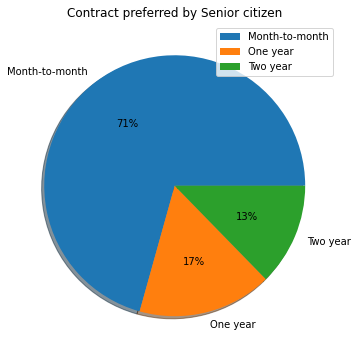

In [16]:
plot = senior_citizen.plot.pie(y='SeniorCitizen', figsize=(6, 6),autopct='%1.f%%',title='Contract preferred by Senior citizen',
                       ylabel='',shadow=True)

From the above pie chart, we can observe that the senior citizen prefer monthly subscription with 71% and comparatively very less in two years with 13%. And also one year with 17%.

 ### 5) Comment your finds on Payment Method?

In [17]:
payment_method = data['PaymentMethod'].value_counts()
payment_method

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

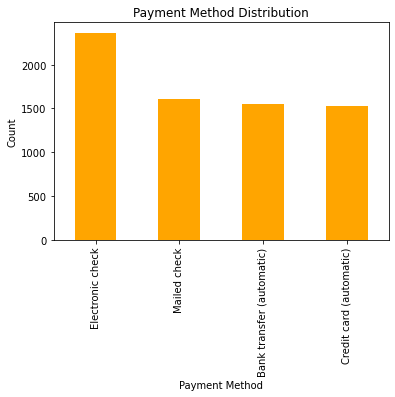

In [18]:
# Overall payment method
payment_method.plot(kind='bar',color='orange')
plt.title('Payment Method Distribution',fontsize=12)
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

The most preferable payment method is Electronic check and rest of Mailed check, Bank transfer(automatic) and Credit Card(automatic) are slighly different from each other.

In [19]:
# Gender wise payment method
male = data[data['gender']=='Male']
male

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.10,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [20]:
male['PaymentMethod'].value_counts()

Electronic check             1195
Mailed check                  834
Credit card (automatic)       770
Bank transfer (automatic)     756
Name: PaymentMethod, dtype: int64

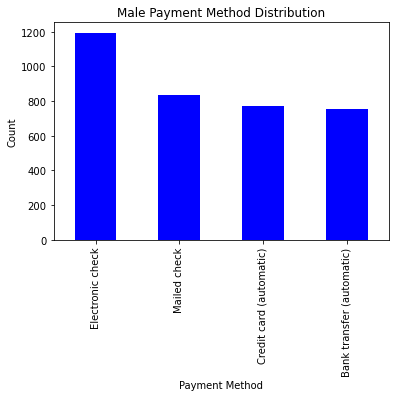

In [21]:
male['PaymentMethod'].value_counts().plot(kind='bar',color='blue')
plt.title('Male Payment Method Distribution',fontsize=12)
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

The male has mostly preferred payment method is Electronic check and rest of Mailed check, Bank transfer(automatic) and Credit Card(automatic) are slighly different from each other.

In [22]:
female = data[data['gender']=='Female']
female

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.30,No
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No


In [23]:
female['PaymentMethod'].value_counts()

Electronic check             1170
Bank transfer (automatic)     788
Mailed check                  778
Credit card (automatic)       752
Name: PaymentMethod, dtype: int64

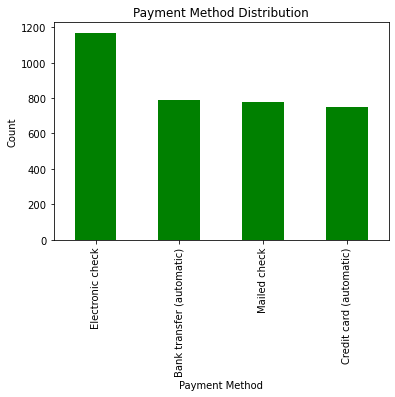

In [24]:
female['PaymentMethod'].value_counts().plot(kind='bar',color='green')
plt.title('Payment Method Distribution',fontsize=12)
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

The female has mostly preferred payment method is Electronic check and rest of Mailed check, Bank transfer(automatic) andCredit Card(automatic) are slighly different from each other.
So male and female are interested more in Electronic check payment method.

In [25]:
# Checking with senior citizen payment method

Female_senior['PaymentMethod'].value_counts()

Electronic check             296
Bank transfer (automatic)    112
Credit card (automatic)      110
Mailed check                  50
Name: PaymentMethod, dtype: int64

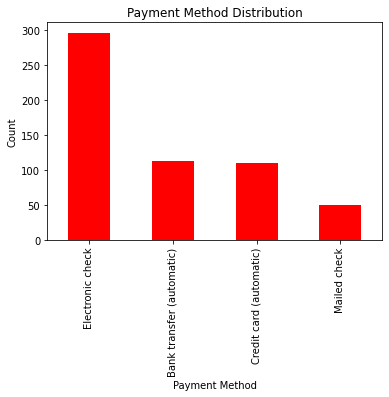

In [26]:
Female_senior['PaymentMethod'].value_counts().plot(kind='bar',color='red')
plt.title('Payment Method Distribution',fontsize=12)
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

The female senior citizen has mostly preferred payment method is used Electronic check and rest of Mailed check, Bank transfer(automatic) and Credit Card(automatic) are slighly different from each other.


In conclusion, Comparing with all payment methods, payment through electronic method is preferred for most telecom customers comparing with Mailed check, Bank transfer(automatic) and Credit Card(automatic). So it is very fast comparing to other mode of transaction. The time is very less and fast transaction. 